#  Data Cleaning and Quality Control on Lafayette River Time Series Data in Summer 2020

Cleaning and quality control of time-series data typically involves several steps, including handling missing values, removing outliers to make it suitable for analysis. Here are some common steps for cleaning temperature data:

1. Handle missing values: If there are missing values in the data, they can be filled using methods such as forward/backward fill, linear interpolation, or using a regression model.
please refer to this link https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/?utm_source=reading_list&utm_medium=

2. Remove outliers: Outliers can have a significant impact on the results of any analysis. You can use statistical methods such as the Z-score or the median absolute deviation to identify and remove outliers from the data.

3. Check for consistency: Check for any inconsistencies in the data such as negative values, or values outside of a reasonable range, or other anomalies. These values can be corrected or removed.

4. Data quality control: verify the accuracy and integrity of the data

5. These steps should be repeated as necessary to ensure that the mooring data is clean and suitable for analysis. The specific steps and techniques used will depend on the characteristics of the data and the goals of the analysis.

6. Data storage: store the cleaned data in certain format or folder that can be used for analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats 
from scipy.stats import zscore
from scipy.stats import linregress

In [2]:
# load in the csv file, you need to specify the directory of the data file
infile = '../data/interim/Mooring_2020/Combined_NY_AC_2020.csv'

# define datatypes
dtypes = {'Temp_NY':float, 'Sal_NY':float, 'Chl_flor_NY':float, 'DO_NY':float,'Turbid_NY':float,'Depth_meter_NY':float,'Total_Depth_NY':float,'Temp_NY_btm':float, 'Sal_NY_btm':float, 'Chl_flor_NY_btm':float, 'DO_NY_btm':float,'Turbid_NY_btm':float,'Depth_meter_NY_btm':float,'Temp_AC':float, 'Sal_AC':float, 'Chl_flor_AC':float, 'DO_AC':float,'Turbid_AC':float,'Depth_meter_AC':float}

# read data usig pandas dataframe and specify column seprator using ','(default)
data = pd.read_csv(infile,dtype=dtypes, header = 0, skiprows = range(1,3), 
                   usecols = ['Date_Time_NY','Temp_NY','Sal_NY','Chl_flor_NY','DO_NY','Depth_meter_NY','Temp_NY_btm','Sal_NY_btm','Chl_flor_NY_btm','DO_NY_btm','Depth_meter_NY_btm','Temp_AC','Sal_AC','Chl_flor_AC','DO_AC','Depth_meter_AC'],
                   parse_dates=['Date_Time_NY'], infer_datetime_format=True,
                   sep =',')



In [3]:
data.describe()

,Temp_NY,Sal_NY,Chl_flor_NY,DO_NY,Depth_meter_NY,Temp_AC,Sal_AC,Chl_flor_AC,DO_AC,Depth_meter_AC,Temp_NY_btm,Sal_NY_btm,Chl_flor_NY_btm,DO_NY_btm,Depth_meter_NY_btm
count,17664.000000,17664.000000,17664.000000,17664.000000,17664.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,17662.000000,17662.000000,17662.000000,17662.000000,17664.000000
mean,24.039037,17.180748,10.977587,6.668298,0.818204,-0.661137,-13.481601,9.922939,-16.715416,-20.499011,4.079080,-1.015460,-3.307745,-11.861628,-12.671290
std,5.390113,11.954597,25.818998,2.937612,2.151407,51.616268,50.737384,102.011283,42.757822,40.739684,46.537659,44.647191,55.272595,39.686804,39.300271
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,20.100000,16.970000,2.900000,5.860000,0.600000,17.350000,-99.000000,2.800000,1.400000,0.122000,19.990000,16.490000,3.900000,4.500000,4.760000
50%,24.760000,18.190000,4.900000,6.660000,0.870000,25.040000,15.730000,8.900000,4.580000,0.493000,23.860000,18.770000,6.500000,6.000000,5.110000
75%,28.010000,19.490000,9.300000,7.440000,1.120000,29.560000,17.570000,18.700000,6.570000,0.831000,27.590000,20.550000,11.000000,6.860000,5.430000
max,32.110000,23.330000,500.000000,18.810000,1.930000,34.830000,21.170000,500.000000,17.380000,1.695000,40.750000,24.230000,500.000000,13.470000,6.300000


#### Slice data only in summer months: June, July, August, September, to Oct 5

In [4]:
# data.set_index('Date_Time', inplace=True)
mask=(data['Date_Time_NY']>= '6/1/2020 0:01') & (data['Date_Time_NY']<= '10/05/2020 23:46')
data =data[mask]

#### Check if this dataset have missing values

In [5]:
if data.isnull().any().any():
    print ("There are missing values")
else:
    print("There are no missing values in any columns")

There are missing values


#### Replace -99 with NaN

In [6]:
# replace -99 with NaN
data.replace(-99, np.nan, inplace=True)

### Detecting outliers using the Z-scores

Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.


In [7]:
# Z-score calculation
z = np.abs(stats.zscore(data['Temp_NY']))
# Identifying outliers
outliers = np.where(z > 3)
print(outliers)

z = np.abs(stats.zscore(data['Sal_NY']))

# Identifying outliers
outliers = np.where(z > 3)
print(outliers)

(array([], dtype=int64),)
(array([], dtype=int64),)


* Apparently, using Z-score to remove the outliers doesn't work well for temperature and salinity
* Because none of the values fall out of the 3rd standard deviation

## Detecting outliers using the Inter Quantile Range(IQR)
Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.
steps:
* Sort the dataset in ascending order
* Calculate the 1st and 3rd quartiles(Q1, Q3)
* Compute IQR=Q3-Q1
* Compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
* Check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [8]:
# data['Temp_NY']=sorted(data['Temp_NY'])
# data['Sal_NY']=sorted(data['Sal_NY'])
# calculate IQR and remove outliers
Q1 = data['Temp_NY'].quantile(0.25)
Q3 = data['Temp_NY'].quantile(0.75)
IQR = Q3 - Q1
data= data[~((data['Temp_NY'] < (Q1 - 1.5 * IQR)) |(data['Temp_NY'] > (Q3 + 1.5 * IQR)))]

# calculate IQR and remove outliers
Q1 = data['Sal_NY'].quantile(0.25)
Q3 = data['Sal_NY'].quantile(0.75)
IQR = Q3 - Q1
data= data[~((data['Sal_NY'] < (Q1 - 1.5 * IQR)) |(data['Sal_NY'] > (Q3 + 1.5 * IQR)))]

* It doesn't work using both Z-score and IQR to detect outliers for this datasets
* But we can use other ways to validate the data (see below)

#### Detecting outliers using the Moving Average (MA) technique
The MA technique calculates the moving average of the data over a specified time window and detects anomalies based on deviations from the moving average.

Criteria: In a normal distribution, about 99.7% of the data points lie within 3 standard deviations of the mean. Therefore, if a data point falls outside this range, it is considered to be statistically significant and may be an anomaly.

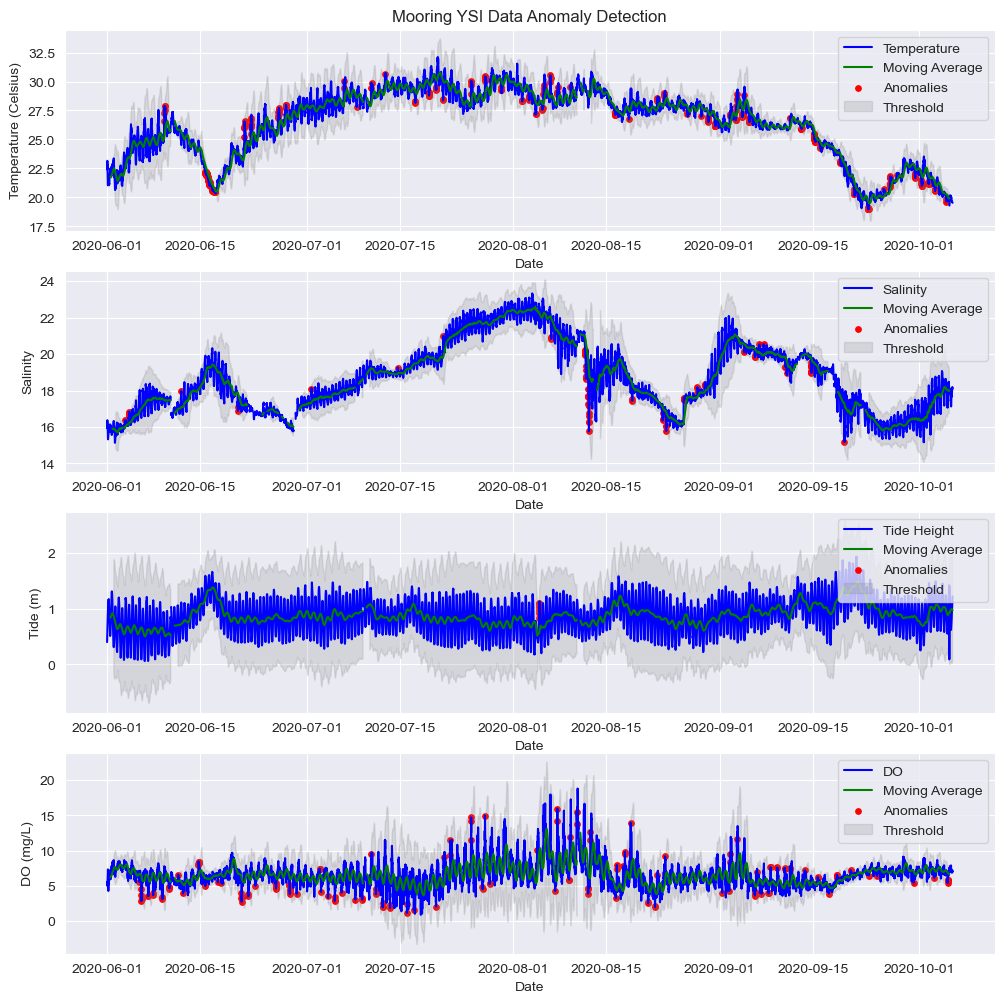

In [9]:
# Calculate the moving average of the temperature readings
window_size = 50 # original was 50
ma_temp = data['Temp_NY'].rolling(window_size).mean()
ma_sal = data['Sal_NY'].rolling(window_size).mean()
ma_tide= data['Depth_meter_NY'].rolling(window_size).mean()
ma_DO= data['DO_NY'].rolling(window_size).mean()
# Calculate the deviation from the moving average
deviation_temp  = data['Temp_NY'] - ma_temp
deviation_sal  = data['Sal_NY'] - ma_sal
deviation_tide  = data['Depth_meter_NY'] - ma_tide
deviation_DO  = data['DO_NY'] - ma_DO

# Calculate the standard deviation of the deviation
std_deviation_temp = deviation_temp.rolling(window_size).std()
std_deviation_sal = deviation_sal.rolling(window_size).std()
std_deviation_tide = deviation_tide.rolling(window_size).std()
std_deviation_DO = deviation_DO.rolling(window_size).std()
# Calculate the threshold for anomaly detection
threshold_temp = 3 * std_deviation_temp
threshold_sal = 3 * std_deviation_sal
threshold_tide = 3 * std_deviation_tide
threshold_DO = 3 * std_deviation_DO
# Detect anomalies based on deviations from the moving average
anomalies = data[deviation_temp.abs() > threshold_temp]

# Plot the temperature and the anomalies
fig, ax = plt.subplots(4,1, figsize=(12, 12))
ax[0].plot(data['Date_Time_NY'], data['Temp_NY'], color='blue', label='Temperature')
ax[0].plot(data['Date_Time_NY'],  ma_temp, color='green', label='Moving Average')
ax[0].scatter(anomalies['Date_Time_NY'], anomalies['Temp_NY'], color='red', s=15, label='Anomalies')
ax[0].fill_between(data['Date_Time_NY'], ma_temp-threshold_temp, ma_temp+threshold_temp, color='gray', alpha=0.2, label='Threshold')
ax[0].set_title('Mooring YSI Data Anomaly Detection')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Temperature (Celsius)')
ax[0].grid(True)
ax[0].legend()

anomalies = data[deviation_sal.abs() > threshold_sal]
ax[1].plot(data['Date_Time_NY'], data['Sal_NY'], color='blue', label='Salinity')
ax[1].plot(data['Date_Time_NY'],  ma_sal, color='green', label='Moving Average')
ax[1].scatter(anomalies['Date_Time_NY'], anomalies['Sal_NY'], color='red', s=15, label='Anomalies')
ax[1].fill_between(data['Date_Time_NY'], ma_sal-threshold_sal, ma_sal+threshold_sal, color='gray', alpha=0.2, label='Threshold')

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Salinity')
ax[1].grid(True)
ax[1].legend()

anomalies = data[deviation_tide.abs() > threshold_tide]
ax[2].plot(data['Date_Time_NY'], data['Depth_meter_NY'], color='blue', label='Tide Height')
ax[2].plot(data['Date_Time_NY'],  ma_tide, color='green', label='Moving Average')
ax[2].scatter(anomalies['Date_Time_NY'], anomalies['Depth_meter_NY'], color='red', s=15, label='Anomalies')
ax[2].fill_between(data['Date_Time_NY'], ma_tide-threshold_tide, ma_tide+threshold_tide, color='gray', alpha=0.2, label='Threshold')
#ax[2].set_title('Mooring Tide Anomaly Detection')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Tide (m)')
ax[2].grid(True)
ax[2].legend(loc='upper right')

anomalies = data[deviation_DO.abs() > threshold_DO]
ax[3].plot(data['Date_Time_NY'], data['DO_NY'], color='blue', label='DO')
ax[3].plot(data['Date_Time_NY'],  ma_DO, color='green', label='Moving Average')
ax[3].scatter(anomalies['Date_Time_NY'], anomalies['DO_NY'], color='red', s=15, label='Anomalies')
ax[3].fill_between(data['Date_Time_NY'], ma_DO-threshold_DO, ma_DO+threshold_DO, color='gray', alpha=0.2, label='Threshold')

ax[3].set_xlabel('Date')
ax[3].set_ylabel('DO (mg/L)')
ax[3].grid(True)
ax[3].legend(loc='upper right')

plt.show()

## Examine the data quality and integrity for station NYCC
River mouth station with water depth ~ 6 m, see the map in README for its location

In [10]:
# set the date column as the index
data.set_index('Date_Time_NY', inplace=True)

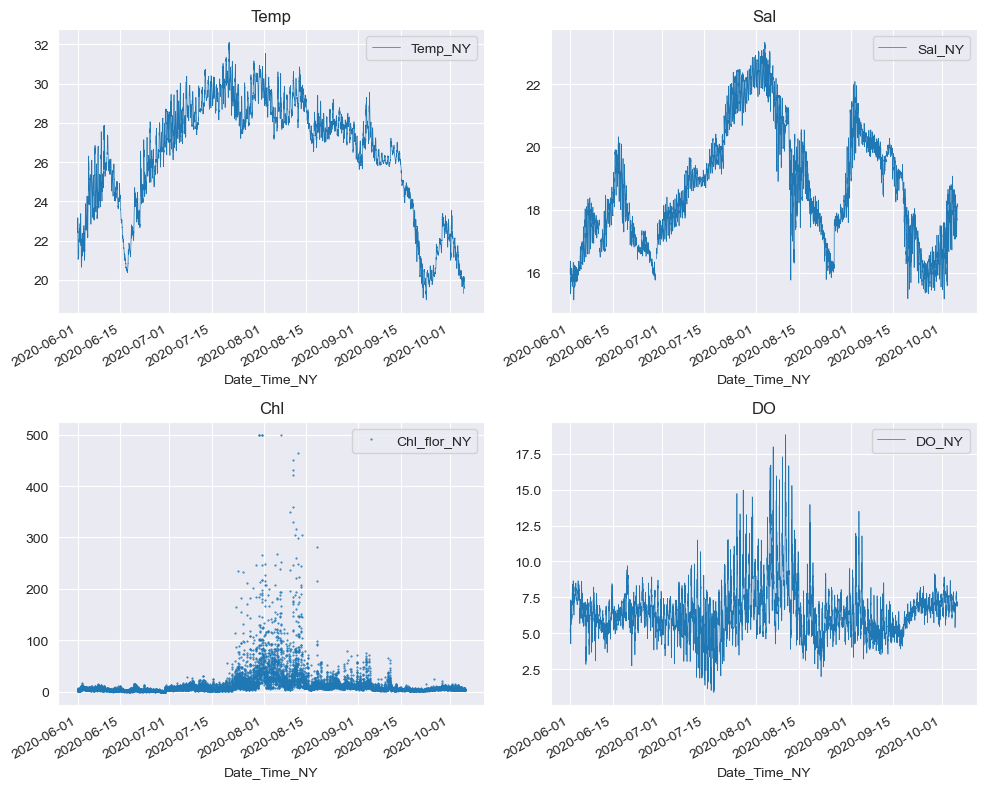

In [11]:
# create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# plot time series data for each variable in a subplot
data.plot(y='Temp_NY', ax=ax[0, 0],kind='line',linestyle='-', linewidth=0.5, grid=True)
ax[0, 0].set_title('Temp')
# ax[0, 0].set_xlabel('Date')
# ax[0, 0].set_ylabel('Temperature')
# ax[0, 0].set_xlim(left='8/10/2020 09:01', right='8/17/2020 0:01')

data.plot(y='Sal_NY', ax=ax[0, 1], kind='line', linestyle='-', linewidth=0.5, grid=True)
ax[0, 1].set_title('Sal')
# ax[0, 1].set_xlim(left='8/10/2020 0:01', right='8/12/2020 0:01')

data.plot(y='Chl_flor_NY', ax=ax[1, 0], kind='line', linestyle='None', marker='o', markersize=0.5)
ax[1, 0].set_title('Chl')
#ax[1, 0].set_xlim(left='7/10/2020 0:01', right='9/19/2020 0:01')

data.plot(y='DO_NY', ax=ax[1, 1], kind='line', linestyle='-', linewidth=0.5, grid=True)
ax[1, 1].set_title('DO')

# adjust spacing between subplots
plt.tight_layout()

# show plot
plt.show()


### Use YSI-discrete-data to validate the mooring data quality and integrity

In [12]:
# load in the csv file for discrete YSI-data at 0.25 m
infile = '../data/interim/YSI_profiles_2020/NYCC/NYCC_VP_2020_at_0.25m.csv'
# define datatypes
dtypes = {'Temp': float, 'Sal': float, 'pH': float, 'Chl_flor': float, 'DO': float}

# read data usig pandas dataframe and specify column seprator using ','(default)
data_YSI = pd.read_csv(infile, dtype=dtypes, header=0, skiprows=range(1, 3),
                   usecols=['Date_Time', 'Temp', 'Sal', 'pH', 'Chl_flor', 'DO'],
                   parse_dates=['Date_Time'], infer_datetime_format=True,
                   sep=',')
data_YSI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date_Time  50 non-null     datetime64[ns]
 1   Temp       49 non-null     float64       
 2   Sal        49 non-null     float64       
 3   pH         38 non-null     float64       
 4   Chl_flor   49 non-null     float64       
 5   DO         49 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.6 KB


#### Plot both YSI-mooring and YSI_discrete variables against datetime
* YSI-mooring data and YSI_discrete data should matchup and cross-validate with each other

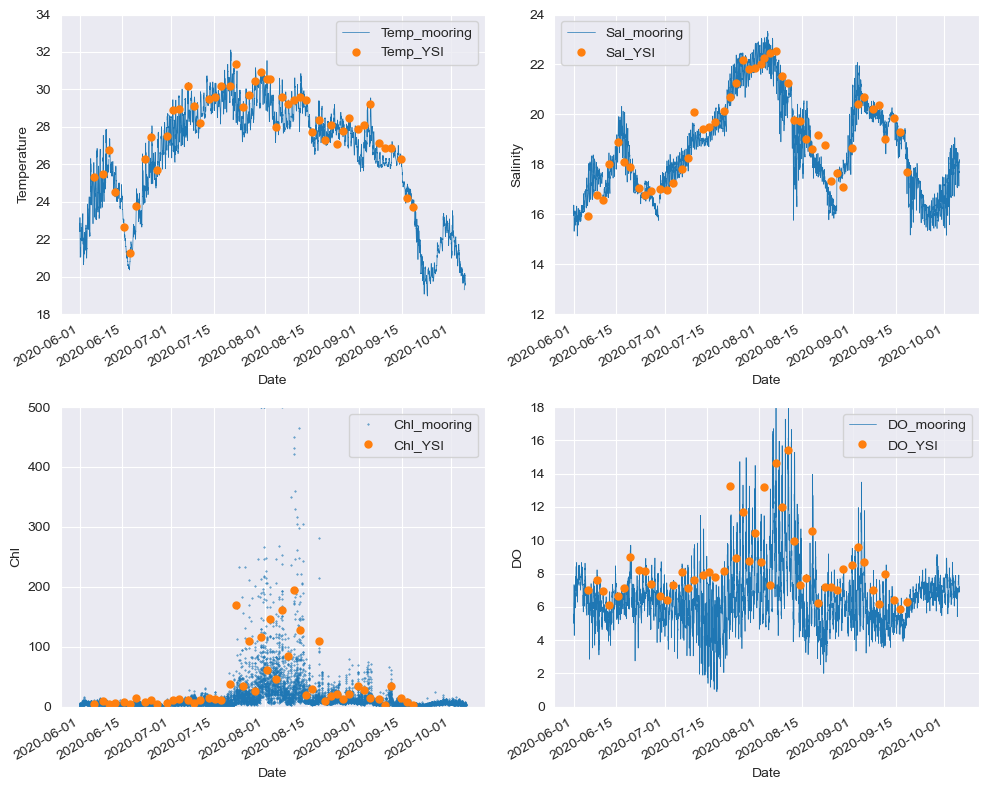

In [13]:
# create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
# plot time series data for each variable in a subplot
data.plot(y='Temp_NY', ax=ax[0, 0], kind='line', linestyle='-', linewidth=0.5, grid=True)
ax[0, 0].plot(data_YSI.Date_Time, data_YSI.Temp, marker='o', markersize=5,linestyle='')
ax[0, 0].set(ylim=(18,34),ylabel='Temperature',xlabel='Date')
ax[0, 0].legend(['Temp_mooring', 'Temp_YSI'])
# ax[0, 0].set_xlim(left='8/10/2020 09:01', right='8/17/2020 0:01')

data.plot(y='Sal_NY', ax=ax[0, 1], kind='line', linestyle='-', linewidth=0.5, grid=True)
ax[0, 1].plot(data_YSI.Date_Time, data_YSI.Sal, marker='o', markersize=5,linestyle='')
ax[0, 1].set(ylim=(12,24),ylabel='Salinity',xlabel='Date')
ax[0, 1].legend(['Sal_mooring', 'Sal_YSI'])


data.plot(y='Chl_flor_NY', ax=ax[1, 0], kind='line', linestyle='None', marker='o', markersize=0.4)
ax[1, 0].set(ylim=(0,500),ylabel='Chl',xlabel='Date')
ax[1, 0].plot(data_YSI.Date_Time, data_YSI.Chl_flor, marker='o', markersize=5,linestyle='')
ax[1, 0].legend(['Chl_mooring', 'Chl_YSI'])


data.plot(y='DO_NY', ax=ax[1, 1], kind='line',linestyle='-', linewidth=0.5, grid=True)
ax[1, 1].plot(data_YSI.Date_Time, data_YSI.DO, marker='o', markersize=5,linestyle='')
ax[1, 1].set(ylim=(0,18),ylabel='DO',xlabel='Date')
ax[1, 1].legend(['DO_mooring', 'DO_YSI'])

# adjust spacing between subplots
plt.tight_layout()
# show plot
plt.show()

#### Draw regression line between YSI_mooring and YSI_discrete to see how well they match up

In [14]:
# reset the index of the DataFrame data back to its default integer index
data.reset_index(inplace=True)

In [15]:
# using indexing to find match-up data_time between the two datasets
idx = np.searchsorted(data.Date_Time_NY, data_YSI.Date_Time, side='left')
idx = np.clip(idx, 1, len(data.Date_Time_NY)) - 1

Temp_mooring = data.Temp_NY
Sal_mooring = data.Sal_NY
Chl_mooring = data.Chl_flor_NY
DO_mooring = data.DO_NY


slope: 0.9925131500399913
intercept: 0.5353638731277606
r_value: 0.9640727750750683
p_value: 3.988187658228083e-28
std_err: 0.040321637345553024
slope: 0.9513026044836813
intercept: 1.1121271431412083
r_value: 0.9634729108750624
p_value: 5.799421048112324e-28
std_err: 0.03898703882239028
slope: 0.695827229123912
intercept: 22.466308347457637
r_value: 0.549965870470203
p_value: 5.1408817865812265e-05
std_err: 0.15580111368789964
slope: 0.9235886199579721
intercept: 1.7526958349579314
r_value: 0.8623891846036787
p_value: 3.3889150645336285e-15
std_err: 0.07993884343062382


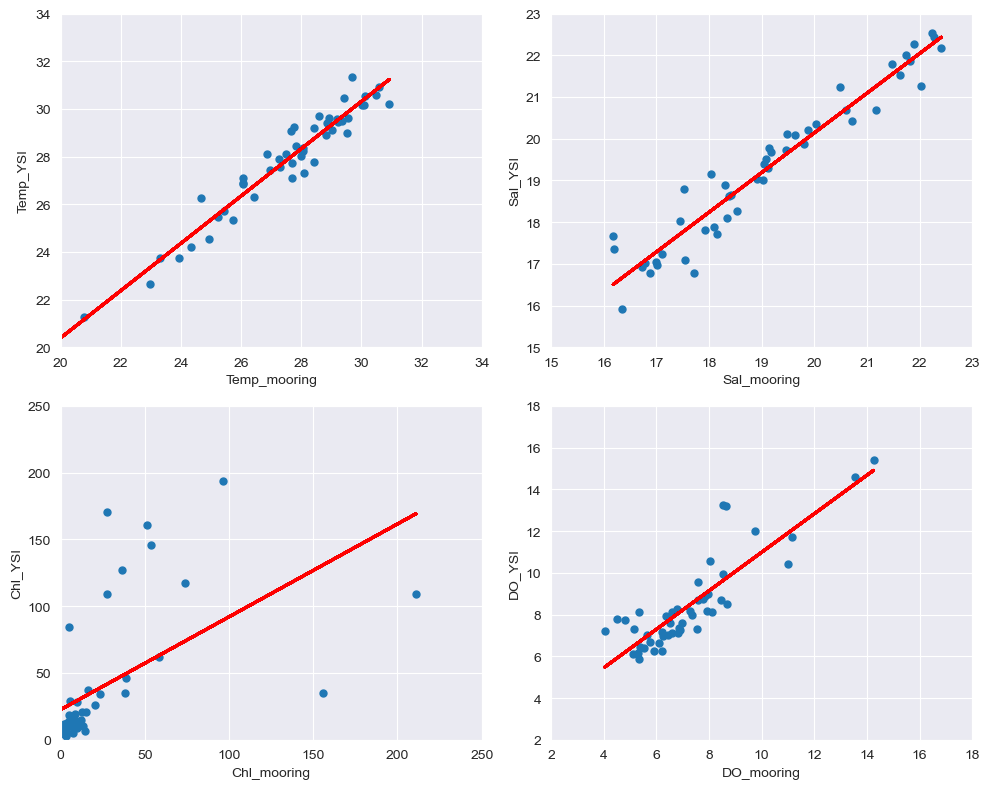

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
x =np.array(Temp_mooring.loc[idx])
y= np.array(data_YSI.Temp)
ax[0, 0].plot(x, y, marker='o', markersize=5, linestyle='')
ax[0, 0].set(ylim=(20,34),xlim=(20,34),ylabel='Temp_YSI',xlabel='Temp_mooring')
valid = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[valid], y[valid])
x_values = [min(x), max(x)]
y_values = [slope*x[valid] + intercept for x[valid] in x_values]
ax[0, 0].plot(x_values, y_values, color='red', linestyle='-',linewidth=2,label='regression line')
print('slope:',slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)

x =np.array(Sal_mooring.loc[idx])
y= np.array(data_YSI.Sal)
ax[0, 1].plot(x, y, marker='o', markersize=5,linestyle='')
ax[0, 1].set(ylim=(15,23),xlim=(15,23),ylabel='Sal_YSI',xlabel='Sal_mooring')
valid = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[valid], y[valid])
x_values = [min(x), max(x)]
y_values = [slope*x[valid] + intercept for x[valid] in x_values]
ax[0, 1].plot(x_values, y_values, color='red', linestyle='-',linewidth=2,label='regression line')
print('slope:',slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)


x =np.array(Chl_mooring.loc[idx])
y= np.array(data_YSI.Chl_flor)
ax[1, 0].plot(x, y, marker='o', markersize=5,linestyle='')
ax[1, 0].set(ylim=(0,250),xlim=(0,250),ylabel='Chl_YSI',xlabel='Chl_mooring')
valid = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[valid], y[valid])
x_values = [min(x), max(x)]
y_values = [slope*x[valid] + intercept for x[valid] in x_values]
ax[1, 0].plot(x_values, y_values, color='red', linestyle='-',linewidth=2,label='regression line')
print('slope:',slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)


x =np.array(DO_mooring.loc[idx])
y= np.array(data_YSI.DO)
ax[1, 1].plot(x, y, marker='o', markersize=5,linestyle='')
ax[1, 1].set(ylim=(2,18),xlim=(2,18),ylabel='DO_YSI',xlabel='DO_mooring')
valid = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[valid], y[valid])
x_values = [min(x), max(x)]
y_values = [slope*x[valid] + intercept for x[valid] in x_values]
ax[1, 1].plot(x_values, y_values, color='red', linestyle='-',linewidth=2,label='regression line')
print('slope:',slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)


plt.tight_layout()
plt.show()

#### Now add Mooring_bottom data to further cross-validate the data quality

In [17]:
# replace weired data
data.loc[(data['Date_Time_NY'] > '7/04/2020 00:00') & (data['Date_Time_NY']< '7/15/2020 10:31'),'Temp_NY_btm'] = np.nan
data.loc[(data['Date_Time_NY'] > '7/04/2020 00:00') & (data['Date_Time_NY']< '7/15/2020 10:31'),'Sal_NY_btm'] = np.nan

In [18]:
# set the date column as the index
data.set_index('Date_Time_NY', inplace=True)

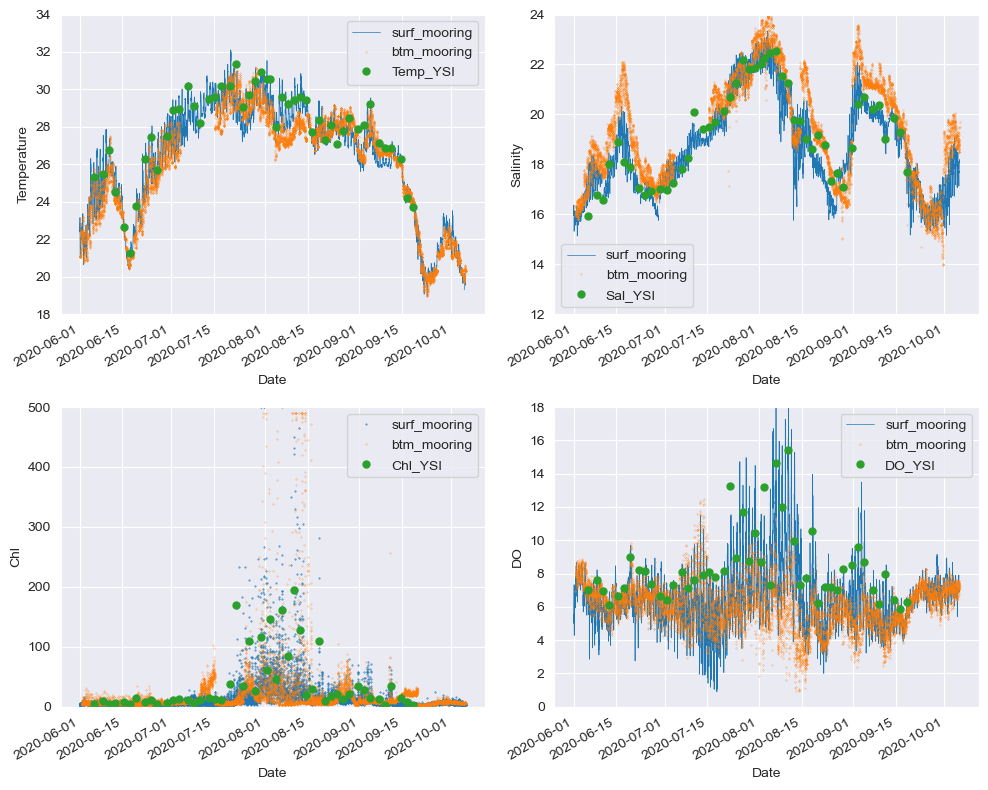

In [19]:
# create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
# plot time series data for each variable in a subplot
data.plot(y='Temp_NY', ax=ax[0, 0], kind='line', linestyle='-', linewidth=0.5, grid=True)
data.plot(y='Temp_NY_btm', ax=ax[0, 0], kind='line', linestyle='None',  marker='o', markersize=0.2,grid=True)
ax[0, 0].plot(data_YSI.Date_Time, data_YSI.Temp, marker='o', markersize=5,linestyle='')
ax[0, 0].set(ylim=(18,34),ylabel='Temperature',xlabel='Date')
ax[0, 0].legend(['surf_mooring', 'btm_mooring','Temp_YSI'])
# ax[0, 0].set_xlim(left='8/10/2020 09:01', right='8/17/2020 0:01')

data.plot(y='Sal_NY', ax=ax[0, 1], kind='line', linestyle='-', linewidth=0.5, grid=True)
data.plot(y='Sal_NY_btm', ax=ax[0, 1], kind='line', linestyle='None', marker='o', markersize=0.2)
ax[0, 1].plot(data_YSI.Date_Time, data_YSI.Sal, marker='o', markersize=5,linestyle='')
ax[0, 1].set(ylim=(12,24),ylabel='Salinity',xlabel='Date')
ax[0, 1].legend(['surf_mooring', 'btm_mooring', 'Sal_YSI'])


data.plot(y='Chl_flor_NY', ax=ax[1, 0], kind='line', linestyle='None', marker='o', markersize=0.4)
data.plot(y='Chl_flor_NY_btm', ax=ax[1, 0], kind='line', linestyle='None', marker='o', markersize=0.2)
ax[1, 0].set(ylim=(0,500),ylabel='Chl',xlabel='Date')
ax[1, 0].plot(data_YSI.Date_Time, data_YSI.Chl_flor, marker='o', markersize=5,linestyle='')
ax[1, 0].legend(['surf_mooring', 'btm_mooring', 'Chl_YSI'])


data.plot(y='DO_NY', ax=ax[1, 1], kind='line', linestyle='-', linewidth=0.5, grid=True)
data.plot(y='DO_NY_btm', ax=ax[1, 1], kind='line', linestyle='None', marker='o', markersize=0.2)
ax[1, 1].plot(data_YSI.Date_Time, data_YSI.DO, marker='o', markersize=5,linestyle='')
ax[1, 1].set(ylim=(0,18),ylabel='DO',xlabel='Date')
ax[1, 1].legend(['surf_mooring', 'btm_mooring', 'DO_YSI'])

# adjust spacing between subplots
plt.tight_layout()
# show plot
plt.show()

#### replace surface salinity segment during 8/18/20 -8/26/20 with bottom salinity

In [20]:
# reset the index of the DataFrame data back to its default integer index
data.reset_index(inplace=True)

In [21]:
mask=(data['Date_Time_NY'] > '8/18/2020 00:00') & (data['Date_Time_NY']< '8/26/2020 23:00')

data.loc[mask,'Sal_NY'] = data.loc[mask,'Sal_NY_btm']

In [22]:
data.set_index('Date_Time_NY', inplace=True)

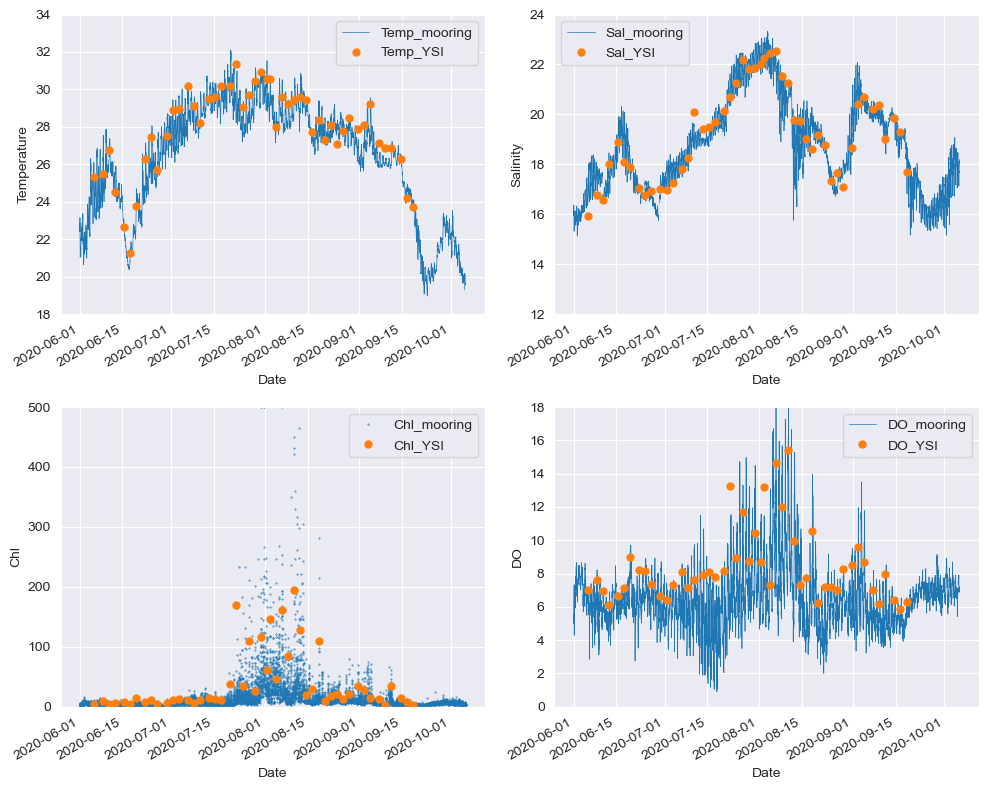

In [23]:
# create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
# plot time series data for each variable in a subplot
data.plot(y='Temp_NY', ax=ax[0, 0], kind='line', linestyle='-', linewidth=0.5, grid=True)
ax[0, 0].plot(data_YSI.Date_Time, data_YSI.Temp, marker='o', markersize=5,linestyle='')
ax[0, 0].set(ylim=(18,34),ylabel='Temperature',xlabel='Date')
ax[0, 0].legend(['Temp_mooring', 'Temp_YSI'])
# ax[0, 0].set_xlim(left='8/10/2020 09:01', right='8/17/2020 0:01')

data.plot(y='Sal_NY', ax=ax[0, 1], kind='line', linestyle='-', linewidth=0.5, grid=True)
ax[0, 1].plot(data_YSI.Date_Time, data_YSI.Sal, marker='o', markersize=5,linestyle='')
ax[0, 1].set(ylim=(12,24),ylabel='Salinity',xlabel='Date')
ax[0, 1].legend(['Sal_mooring', 'Sal_YSI'])


data.plot(y='Chl_flor_NY', ax=ax[1, 0], kind='line', linestyle='None', marker='o', markersize=0.4)
ax[1, 0].set(ylim=(0,500),ylabel='Chl',xlabel='Date')
ax[1, 0].plot(data_YSI.Date_Time, data_YSI.Chl_flor, marker='o', markersize=5,linestyle='')
ax[1, 0].legend(['Chl_mooring', 'Chl_YSI'])


data.plot(y='DO_NY', ax=ax[1, 1], kind='line', linestyle='-', linewidth=0.5,grid=True)
ax[1, 1].plot(data_YSI.Date_Time, data_YSI.DO, marker='o', markersize=5,linestyle='')
ax[1, 1].set(ylim=(0,18),ylabel='DO',xlabel='Date')
ax[1, 1].legend(['DO_mooring', 'DO_YSI'])

# adjust spacing between subplots
plt.tight_layout()
# show plot
plt.show()

### Conclusion
* The match-up of temperature and salinity between YSI-mooring and YSI-discrete sampling were good
* Chl match-up is good in lower range, but not very good in high range, it is reasonable because bloom water was patchy, YSI mooring sampling frequency was 15 minutes, bloom water may have passed by already
* Photosynthesis is the primary driver for DO variability, therefore, similar to Chl, the match-ups for DO isn't as good as temperature and salinity.

## Examine the data quality and integrity for station AC
 headwater station with ~ 2 m water depth, see the map in README for its location

In [24]:
# load in the csv file for discrete YSI-data at 0.25 m
infile = '../data/interim/YSI_profiles_2020/AC/AC_VP_2020_at_0.2m.csv'
# define datatypes
dtypes = {'Temp': float, 'Sal': float, 'pH': float, 'Chl_flor': float, 'DO': float}

# read data usig pandas dataframe and specify column seprator using ','(default)
data_YSI_AC = pd.read_csv(infile, dtype=dtypes, header=0, skiprows=range(1, 3),
                       usecols=['Date_Time', 'Temp', 'Sal', 'pH', 'Chl_flor', 'DO'],
                       parse_dates=['Date_Time'], infer_datetime_format=True,
                       sep=',')
data_YSI_AC.describe()

,Temp,Sal,pH,Chl_flor,DO
count,44.000000,44.000000,34.000000,44.000000,44.000000
mean,29.454545,16.917955,7.821176,30.534091,8.930909
std,2.523800,1.868558,0.420489,21.780020,1.959448
min,21.980000,13.620000,6.740000,9.400000,5.770000
25%,28.167500,15.482500,7.647500,16.375000,7.412500
50%,30.020000,16.945000,7.915000,21.350000,8.770000
75%,31.080000,18.257500,8.067500,33.800000,10.397500
max,32.870000,20.640000,8.670000,107.900000,13.300000


In [25]:
# reset the index of the DataFrame data back to its default integer index
data.reset_index(inplace=True)

data.loc[(data['Date_Time_NY'] > '9/04/2020 18:30') & (data['Date_Time_NY']< '9/11/2020 20:01'),'Sal_AC'] = np.nan

# using indexing to find match-up data_time between the two datasets
idx = np.searchsorted(data.Date_Time_NY, data_YSI_AC.Date_Time, side='left')
idx = np.clip(idx, 1, len(data.Date_Time_NY)) - 1

Temp_mooring = data.Temp_AC
Sal_mooring = data.Sal_AC
Chl_mooring = data.Chl_flor_AC
DO_mooring = data.DO_AC

In [26]:
data.set_index('Date_Time_NY', inplace=True)

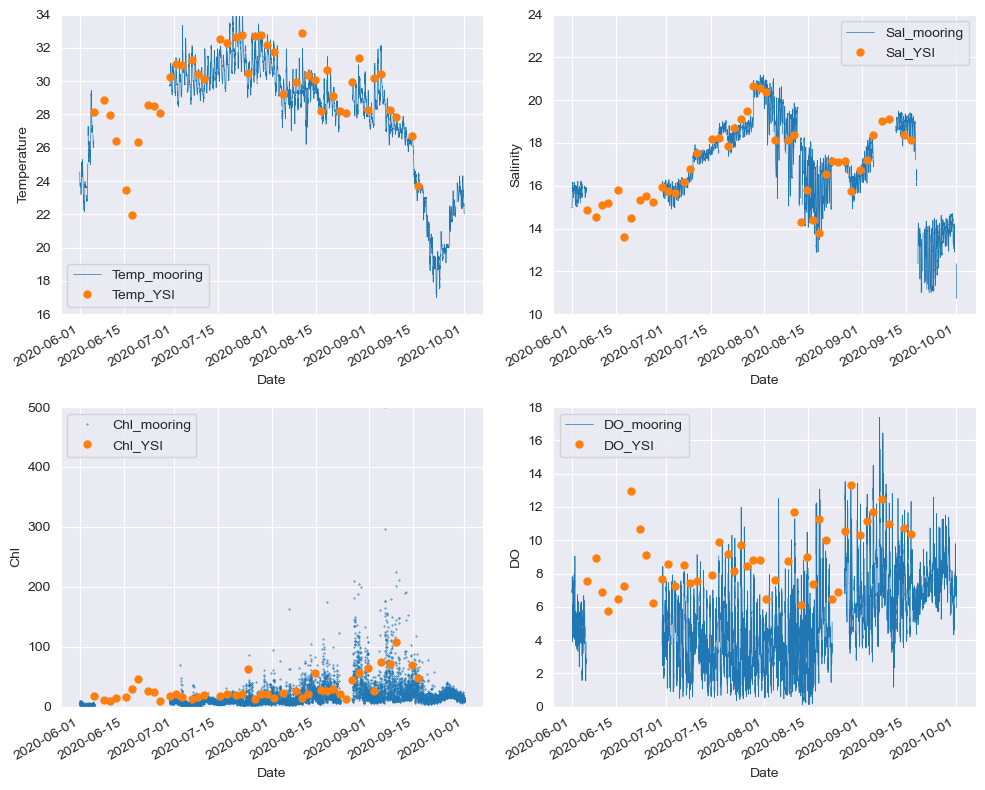

In [27]:
# create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
# plot time series data for each variable in a subplot
data.plot(y='Temp_AC', ax=ax[0, 0], kind='line', linestyle='-', linewidth=0.5, grid=True)
ax[0, 0].plot(data_YSI_AC.Date_Time, data_YSI_AC.Temp, marker='o', markersize=5,linestyle='')
ax[0, 0].set(ylim=(16,34),ylabel='Temperature',xlabel='Date')
ax[0, 0].legend(['Temp_mooring', 'Temp_YSI'])
# ax[0, 0].set_xlim(left='8/10/2020 09:01', right='8/17/2020 0:01')

data.plot(y='Sal_AC', ax=ax[0, 1], kind='line', linestyle='-', linewidth=0.5, grid=True)
ax[0, 1].plot(data_YSI_AC.Date_Time, data_YSI_AC.Sal, marker='o', markersize=5,linestyle='')
ax[0, 1].set(ylim=(10,24),ylabel='Salinity',xlabel='Date')
ax[0, 1].legend(['Sal_mooring', 'Sal_YSI'])


data.plot(y='Chl_flor_AC', ax=ax[1, 0], kind='line', linestyle='None', marker='o', markersize=0.4)
ax[1, 0].set(ylim=(0,500),ylabel='Chl',xlabel='Date')
ax[1, 0].plot(data_YSI_AC.Date_Time, data_YSI_AC.Chl_flor, marker='o', markersize=5,linestyle='')
ax[1, 0].legend(['Chl_mooring', 'Chl_YSI'])


data.plot(y='DO_AC', ax=ax[1, 1], kind='line', linestyle='-', linewidth=0.5,grid=True)
ax[1, 1].plot(data_YSI_AC.Date_Time, data_YSI_AC.DO, marker='o', markersize=5,linestyle='')
ax[1, 1].set(ylim=(0,18),ylabel='DO',xlabel='Date')
ax[1, 1].legend(['DO_mooring', 'DO_YSI'])

# adjust spacing between subplots
plt.tight_layout()
# show plot
plt.show()

#### Draw regression line between YSI_mooring and YSI_discrete to see how well they match up

slope: 0.9480078167133201
intercept: 1.9116317034522297
r_value: 0.927856518906766
p_value: 5.952805510193234e-14
std_err: 0.07075676964640537
slope: 0.9797540358401409
intercept: 0.3429794132325199
r_value: 0.8746736206591903
p_value: 5.545881041401519e-10
std_err: 0.10448963953105947
slope: 0.5180290856432433
intercept: 24.303275502558044
r_value: 0.3795023213281816
p_value: 0.03523520221593341
std_err: 0.2345157458089067
slope: 0.4105820919558292
intercept: 6.620216585617018
r_value: 0.6620332824230073
p_value: 4.984064471220573e-05
std_err: 0.08631335658999509


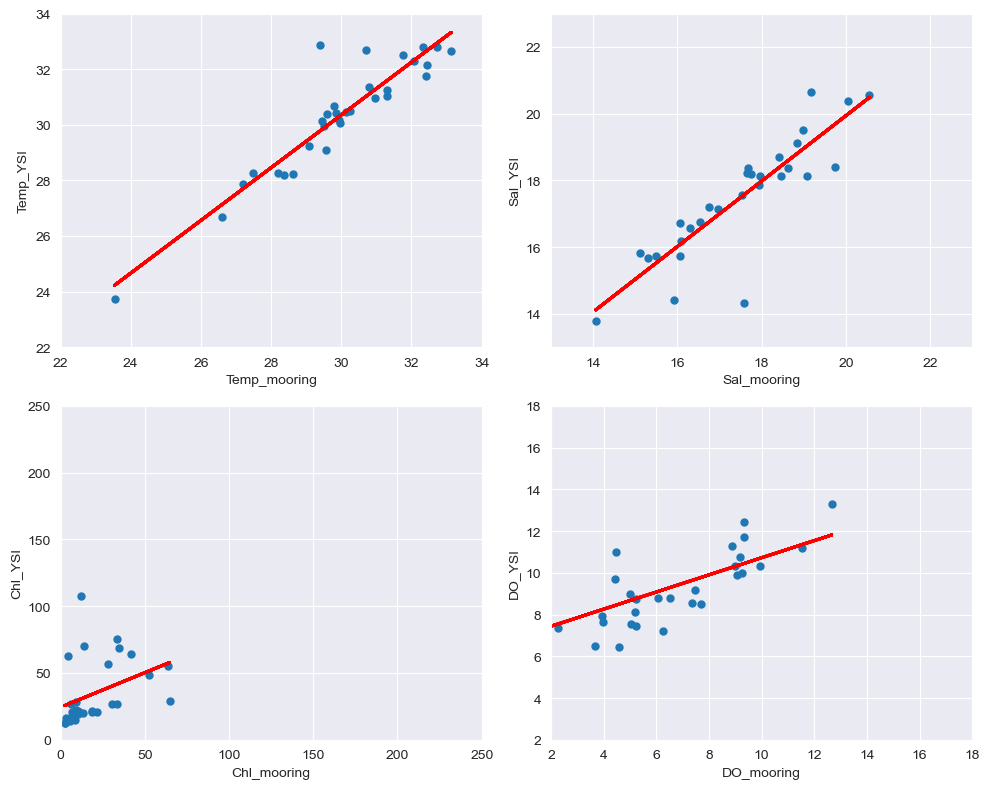

In [28]:

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
x =np.array(Temp_mooring.loc[idx])
y= np.array(data_YSI_AC.Temp)
ax[0, 0].plot(x, y, marker='o', markersize=5, linestyle='')
valid = ~np.isnan(x) & ~np.isnan(y)
x_valid=x[valid]
y_valid=y[valid]
slope, intercept, r_value, p_value, std_err = linregress(x[valid], y[valid])
x_values = [min(x[valid]), max(x[valid])]
y_values = [slope*x[valid] + intercept for x[valid] in x_values]
ax[0, 0].plot(x_values, y_values, color='red', linestyle='-',linewidth=2,label='regression line')
ax[0, 0].set(ylim=(22,34),xlim=(22,34),ylabel='Temp_YSI',xlabel='Temp_mooring')
print('slope:',slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)

x =np.array(Sal_mooring.loc[idx])
y= np.array(data_YSI_AC.Sal)
ax[0, 1].plot(x, y, marker='o', markersize=5,linestyle='')
ax[0, 1].set(ylim=(13,23),xlim=(13,23),ylabel='Sal_YSI',xlabel='Sal_mooring')
valid = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[valid], y[valid])
x_values = [min(x[valid]), max(x[valid])]
y_values = [slope*x[valid] + intercept for x[valid] in x_values]
ax[0, 1].plot(x_values, y_values, color='red', linestyle='-',linewidth=2,label='regression line')
print('slope:',slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)


x =np.array(Chl_mooring.loc[idx])
y= np.array(data_YSI_AC.Chl_flor)
ax[1, 0].plot(x, y, marker='o', markersize=5,linestyle='')
ax[1, 0].set(ylim=(0,250),xlim=(0,250),ylabel='Chl_YSI',xlabel='Chl_mooring')
valid = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[valid], y[valid])
x_values = [min(x[valid]), max(x[valid])]
y_values = [slope*x[valid] + intercept for x[valid] in x_values]
ax[1, 0].plot(x_values, y_values, color='red', linestyle='-',linewidth=2,label='regression line')
print('slope:',slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)


x =np.array(DO_mooring.loc[idx])

y= np.array(data_YSI_AC.DO)
ax[1, 1].plot(x, y, marker='o', markersize=5,linestyle='')
ax[1, 1].set(ylim=(2,18),xlim=(2,18),ylabel='DO_YSI',xlabel='DO_mooring')
valid = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[valid], y[valid])
x_values = [min(x[valid]), max(x[valid])]
y_values = [slope*x[valid] + intercept for x[valid] in x_values]
ax[1, 1].plot(x_values, y_values, color='red', linestyle='-',linewidth=2,label='regression line')
print('slope:',slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)


plt.tight_layout()
plt.show()

### Conclusion
* The match-up of temperature and salinity between YSI-mooring and YSI-discrete sampling were good
* Chl match-up is good in lower range, but not very good in high range, it is reasonable because bloom water was patchy, YSI mooring sampling frequency was 15 minutes, bloom water may have passed by already
* DO match-ups were very off, need to go back to raw files of mooring-YSI and double check

In [29]:
# reset the index of the DataFrame data back to its default integer index
data.reset_index(inplace=True)
# calibrate Chl_flor using extracted Chl
Chl_NY = (data['Chl_flor_NY']*1.1368) + 6.7991;
Chl_AC= (data['Chl_flor_AC']*1.1368) + 6.7991;
Chl_NY_btm = (data['Chl_flor_NY_btm']*1.1368) + 6.7991;
# drop 'DO_AC' because it doesn't pass the quality control
data = data.drop('DO_AC',  axis=1)
data = data.drop('Chl_flor_NY',  axis=1)
data = data.drop('Chl_flor_AC',  axis=1)
data = data.drop('Chl_flor_NY_btm',  axis=1)
# inserting  column at position
data.insert(3, 'Chl_NY', Chl_NY)
data.insert(8, 'Chl_AC', Chl_AC)
data.insert(12, 'Chl_NY_btm', Chl_NY_btm)
# Save the DataFrame to a CSV file
data.to_csv(r'../data/processed/Cleaned_mooring_2020.csv', index=False)